## Using Entire history of state measurements

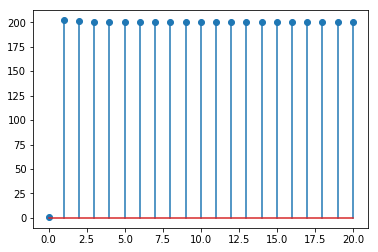

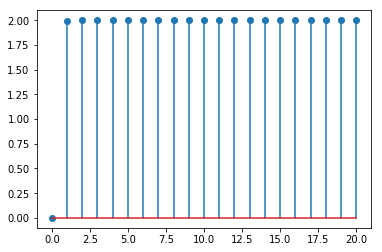

In [49]:
# Find the distributions as a function of t (abstract over number of time steps)
# I also want to see state paths that are generated (2d graph against time)
# Find distributions abstracted over values of a
# Find distributions abstracted over initial state?
# Find distributions abstracted over spread of noise, and maybe mean?

import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

x0 = 1
a_hat0 = 0
y0 = 0
sigma = 0.01
u = 200
a = 2
T = 20

def trial():
    w_trace = []
    x_trace = [x0]
    a_hat_trace = [a_hat0]
    y_trace = [y0]

    for i in range(T):
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal()*sigma
        x_new = (a-a_hat_t)*x_t + w_t + u
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*y_t + a*x_t**2 + w_t*x_t)/(y_t+x_t**2)
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    plt.stem(x_trace)
    plt.figure()
    plt.stem(a_hat_trace)
    return a_hat_trace[-1]

ahats = []

for i in range(1):
    ahats.append(trial())

In [21]:
print(np.mean(ahats)-a, np.var(ahats))

0.00022718946573796472 0.0


## Using only last two measurements

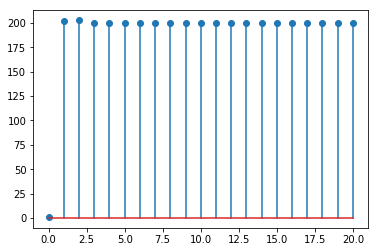

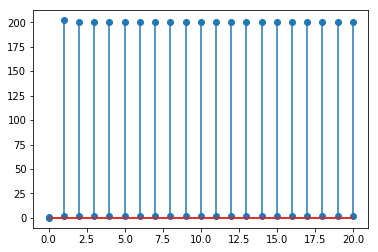

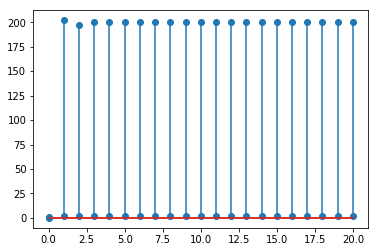

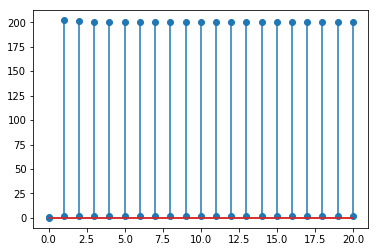

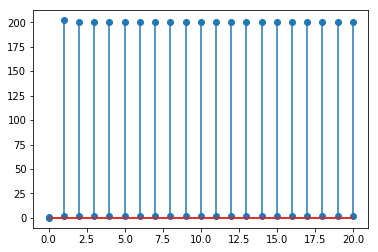

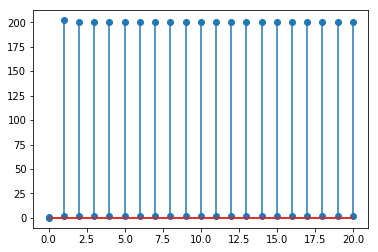

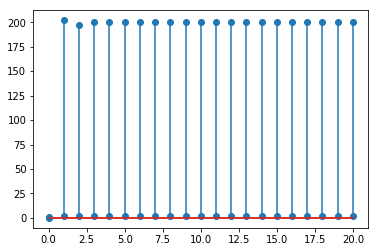

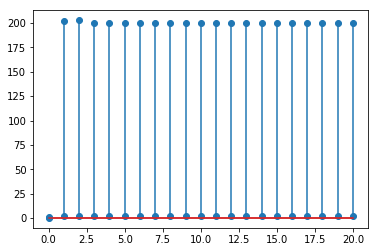

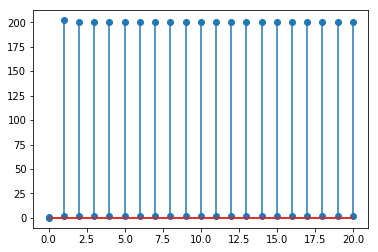

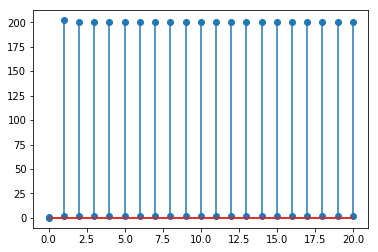

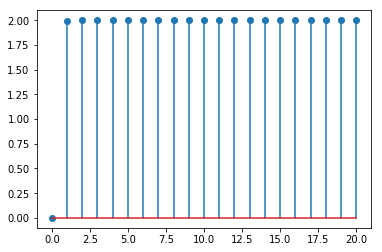

In [51]:
# Find the distributions as a function of t (abstract over number of time steps)
# I also want to see state paths that are generated (2d graph against time)
# Find distributions abstracted over values of a
# Find distributions abstracted over initial state?
# Find distributions abstracted over spread of noise, and maybe mean?

import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

x0 = 1
a_hat0 = 0
y0 = 0
sigma = 0.01
u = 200
a = 2
T = 20

def trial():
    w_trace = []
    x_trace = [x0]
    a_hat_trace = [a_hat0]
    y_trace = [y0]

    for i in range(T):
        x_t = x_trace[-1]
        if len(x_trace) < 2:
            x_t_1 = 0
        else:
            x_t_1 = x_trace[-2]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal()*sigma
        x_new = (a-a_hat_t)*x_t + w_t + u
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*x_t_1**2 + a*x_t**2 + w_t*x_t)/(x_t_1**2+x_t**2)
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    plt.stem(x_trace)
    plt.figure()
    plt.stem(a_hat_trace)
    return a_hat_trace[-1]

ahats = []

for i in range(10):
    ahats.append(trial())

## Looking at having two players (recheck equations and code)

In [5]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

x0 = 1
a_hat0 = 0
y0 = 0
a = 2
T = 1000

def trial():
    x_trace = [x0]
    a_hat_trace = [a_hat0]
    y_trace = [y0]
    
    # Correct this to account for estimation by only subtracting their input from the state (two different a hats)
    for i in range(T):
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        u1 = -a_hat_t * x_t
        u2 = -a_hat_t * x_t
        x_new = a*x_t + u1 + u2
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*y_t + a*x_t**2)/(y_t+x_t**2)
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
    #plt.stem(x_trace)
    return a_hat_trace[-1]

ahats = []

for i in range(100):
    ahats.append(trial())

OverflowError: (34, 'Result too large')

## Start of visualization code

The histograms if viewed, should have the same bin spacing

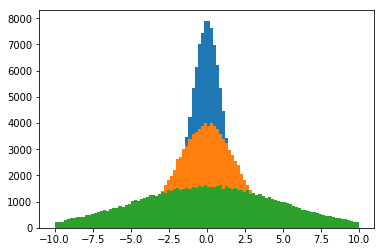

In [68]:
rand_nums = []
for i in range(100000):
    rand_nums.append(np.random.normal())
n, bins, _ = plt.hist(rand_nums, 100, range=(-10,10))
n1, bins1, _ = plt.hist(np.multiply(rand_nums, 2), bins=bins)
n2, bins2, _ = plt.hist(np.multiply(rand_nums, 5), bins=bins)

In [1]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

np.random.seed()

def trial(a, u, sigma_x, T):
    np.random.seed()
    w_trace = []
    x_trace = [np.random.normal()*sigma_x]
    a_hat_trace = [0]
    y_trace = [0]

    for i in range(T):
        # Get current state
        x_t = x_trace[-1]
        a_hat_t = a_hat_trace[-1]
        y_t = y_trace[-1]
        w_t = np.random.normal()
        
        # State update
        x_new = (a-a_hat_t)*x_t + w_t + u
        y_new = y_t + x_t**2
        a_hat_new = (a_hat_t*y_t + a*x_t**2 + w_t*x_t)/(y_t+x_t**2)
        
        # Add to trace
        x_trace.append(x_new)
        y_trace.append(y_new)
        a_hat_trace.append(a_hat_new)
        w_trace.append(w_t)
    w_trace.append(np.random.normal())
    return np.array((x_trace, a_hat_trace, np.array(w_trace)))

def generate_data_with_params(a, u, sigma_x, T, N):
    trials = []
    for i in range(N):
        trials.append(trial(a, u, sigma_x, T))
    return trials

In [46]:
def plot_exp(exps, hist_bins, ahat_endpoints, x_endpoints):
    f, ax = plt.subplots(len(exps), 2, figsize=(15, 15))
    for j in range(len(exps)):
        XNs = []
        Ns = []
        for i in range(31):
            N, bins = np.histogram(exps[j][:, 1, i], hist_bins, range=ahat_endpoints[j])
            XN, Xbins = np.histogram(exps[j][:, 0, i], hist_bins, range=x_endpoints[j])
            Ns.append(N)
            XNs.append(XN)
        Ns = np.array(Ns)
        XNs = np.array(XNs)
        ax[j,0].imshow(np.power(Ns, 0.5))
        ax[j,0].set_xticks(range(hist_bins+1)[::hist_bins//5])
        ax[j,0].set_xticklabels(np.around(bins[::hist_bins//5], decimals=1));
        ax[j,1].imshow(np.power(XNs, 0.5))
        ax[j,1].set_xticks(range(hist_bins+1)[::hist_bins//5])
        ax[j,1].set_xticklabels(np.around(Xbins[::hist_bins//5], decimals=1));

#experiments = []
#for param in np.logspace(-1, 3, num=7):
#    trials = generate_data_with_params(10, param, 0.1, 30, 1000)
#    trials = np.array(trials)
#    experiments.append(trials)
#plot_exp(experiments, 100, [(-5 + 10, 10 + 5) for p in paramspace], [(0, 1000) for p in paramspace])

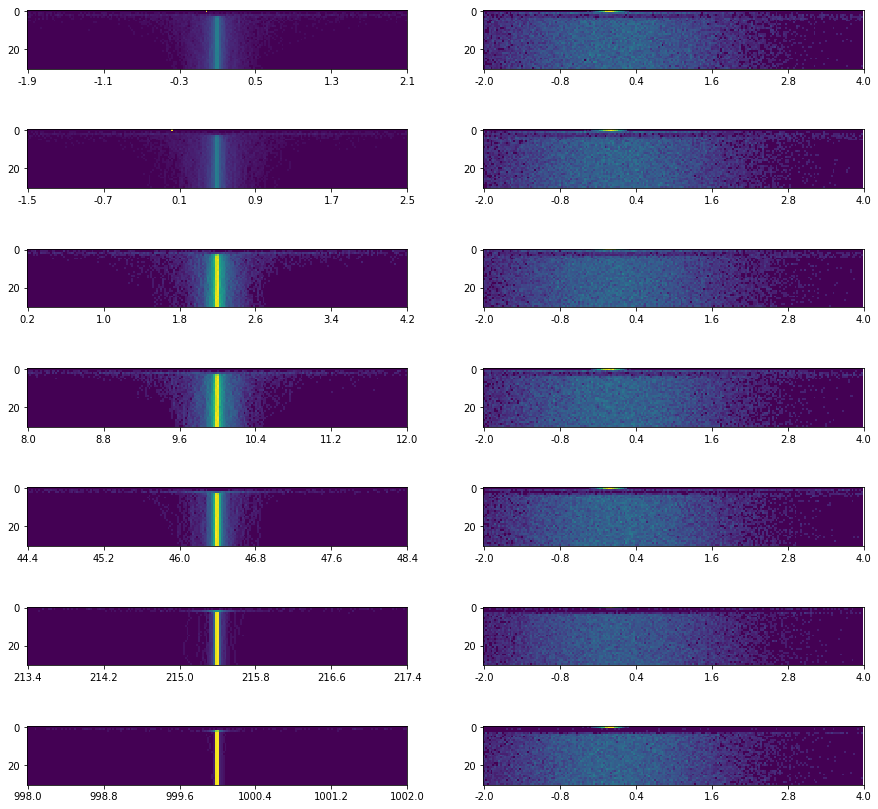

In [47]:
experiments = []
paramspace = np.logspace(-1, 3, num=7)
for p in paramspace:
    trials = generate_data_with_params(p, 0.1, 0.1, 30, 1000)
    trials = np.array(trials)
    experiments.append(trials)
plot_exp(experiments, 200, [(-2 + p, 2 + p) for p in paramspace], [(-3, 3) for p in paramspace])

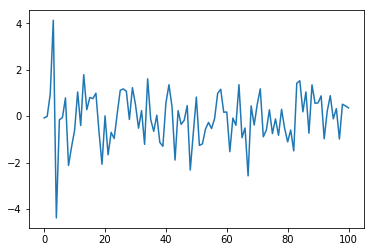

In [65]:
trials2 = generate_data_with_params(2, 0.01, 0.1, 100, 1000)
trials2 = np.array(trials2)
for i in range(1):
    plt.plot(trials2[i,0, :])


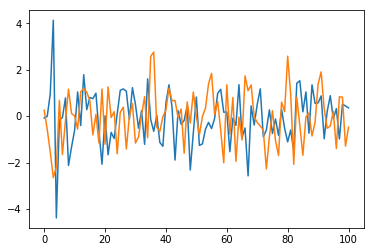

In [67]:
for i in range(2):
    plt.plot(trials2[i,0, :])
